In [20]:
from os.path import join, exists
import pandas as pd
from fastai.vision import *
from fastai.vision.models.wrn import wrn_22
from pathlib import Path
from coreml.utils.io import read_yml

In [6]:
untar_data(URLs.CIFAR)

PosixPath('/root/.fastai/data/cifar10')

In [7]:
path = url2path(URLs.CIFAR)

In [11]:
path

PosixPath('/root/.fastai/data/cifar10')

In [12]:
ls /root/.fastai/data/cifar10

labels.txt  test/  train/


In [26]:
ds_tfms = ([*rand_pad(4, 32), flip_lr(p=0.5)], [])

In [27]:
ds_tfms

([RandTransform(tfm=TfmPixel (pad), kwargs={'padding': 4, 'mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (crop), kwargs={'size': 32, 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True)],
 [])

In [15]:
workers = 10

In [44]:
data = ImageDataBunch.from_folder(path, valid='test', ds_tfms=ds_tfms, bs=512,
                                  num_workers=workers).normalize(cifar_stats)

In [23]:
learn = Learner(data, models.resnet18(), metrics=accuracy)

In [25]:
learn.fit_one_cycle(35, 3e-3, wd=0.4)

epoch,train_loss,valid_loss,accuracy,time
0,0.194948,0.443397,0.859500,00:16
1,0.205698,0.461251,0.858900,00:17
2,0.235738,0.503036,0.839900,00:17
3,0.274978,0.505692,0.836300,00:17
4,0.326718,0.564519,0.818100,00:18
5,0.397572,0.619342,0.799100,00:18
6,0.455116,0.772857,0.743500,00:18
7,0.508400,0.784774,0.742300,00:18
8,0.544217,0.916666,0.703500,00:18
9,0.558559,0.757938,0.751000,00:18


In [53]:
exists(join(path, 'train/ISIC_0052212.jpg'))

True

In [62]:
data = ImageDataBunch.from_df(path=Path('/'), df=df, ds_tfms=tfms, size=224, fn_col='name', label_col='label')

In [63]:
data.normalize(imagenet_stats);

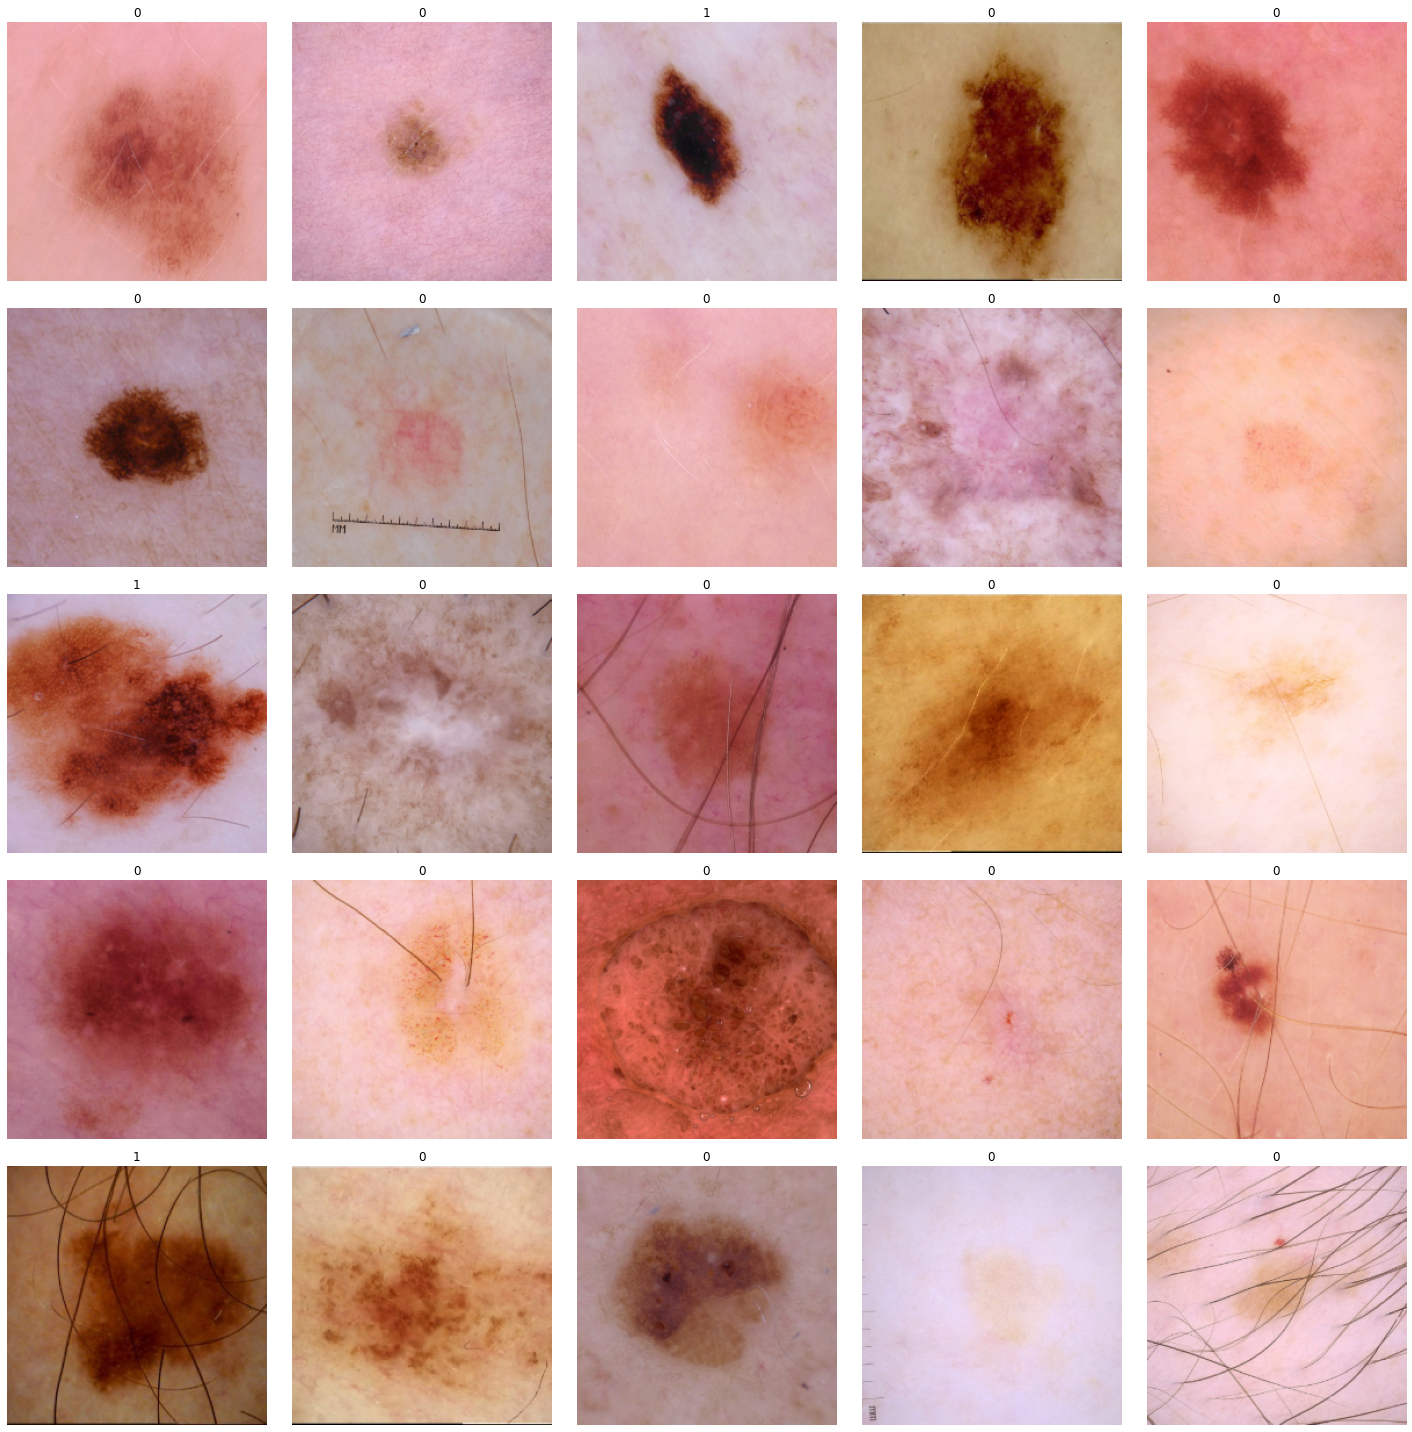

In [64]:
data.show_batch()

In [ ]:
data